### Flight Price Prediction
Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

10683 rows and 11 columns

In [4]:
#checking dtype
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Except the the price column being numerical, the rest are showing as object

In [5]:
#checking unique values
for i in df.columns:
    print("no of unique values in",i,':', df[i].nunique())

no of unique values in Airline : 12
no of unique values in Date_of_Journey : 44
no of unique values in Source : 5
no of unique values in Destination : 6
no of unique values in Route : 128
no of unique values in Dep_Time : 222
no of unique values in Arrival_Time : 1343
no of unique values in Duration : 368
no of unique values in Total_Stops : 5
no of unique values in Additional_Info : 10
no of unique values in Price : 1870


The data seems to be categorical

In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


There probably are outliers and skewness in the price column as the differene between the 75th and max value is large.

In [7]:
#checking null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

there seems to be just a single null value in route and total stop. We can remove the same

In [8]:
#droping nan
df.dropna(axis=0,inplace=True)

In [9]:
df['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

The date column, we can extract the date, month and year

In [10]:
df['Date_of_Journey'] = pd.to_datetime(df.Date_of_Journey)
#making new columns for the values in date colum

df['Year'] = df['Date_of_Journey'].dt.year
df['Month'] = df['Date_of_Journey'].dt.month
df['Day'] = df['Date_of_Journey'].dt.day

In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3


In [12]:
#Removing the date column
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [13]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3


In [14]:
#checking additional info
df['Additional_Info'].value_counts(),df['Additional_Info'].nunique()

(No info                         8344
 In-flight meal not included     1982
 No check-in baggage included     320
 1 Long layover                    19
 Change airports                    7
 Business class                     4
 No Info                            3
 Red-eye flight                     1
 2 Long layover                     1
 1 Short layover                    1
 Name: Additional_Info, dtype: int64,
 10)

The majority info in the column is not available, we could drop the same

In [15]:
df.drop(['Additional_Info'],inplace=True, axis=1)

In [16]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Year,Month,Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,2019,1,3


Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


<AxesSubplot:xlabel='Airline', ylabel='count'>

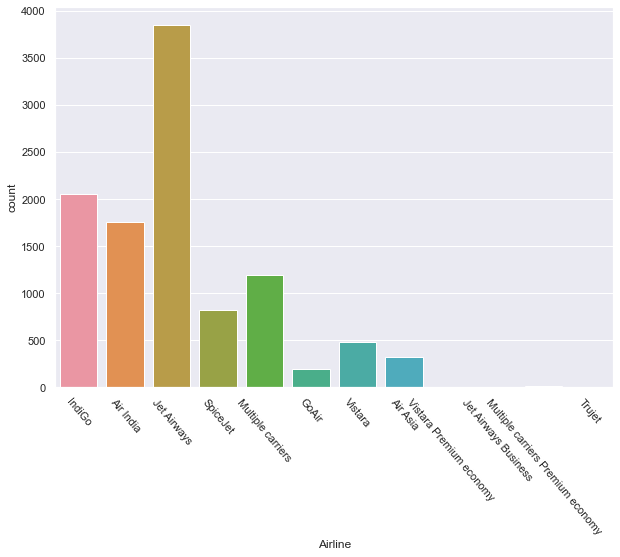

In [17]:
#checking the clumns
sns.set_theme(style="darkgrid")
print(df['Airline'].value_counts())
plt.figure(figsize=(10,7))
plt.xticks(rotation=-50)
sns.countplot(df['Airline'])

As the data suggests majority of the airlines belongs to the jet airways, followed by indigo

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


<AxesSubplot:xlabel='Source', ylabel='count'>

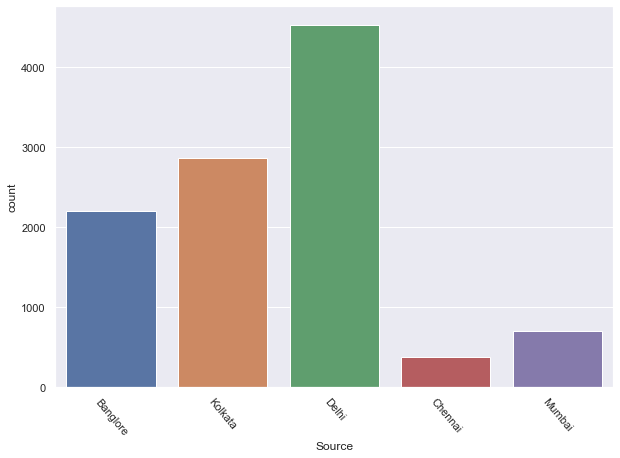

In [18]:
#checking the clumns
sns.set_theme(style="darkgrid")
print(df['Source'].value_counts())
plt.figure(figsize=(10,7))
plt.xticks(rotation=-50)
sns.countplot(df['Source'])

The source cities from where the journey starts with Delhi topping the list followed by kolkata

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


<AxesSubplot:xlabel='Destination', ylabel='count'>

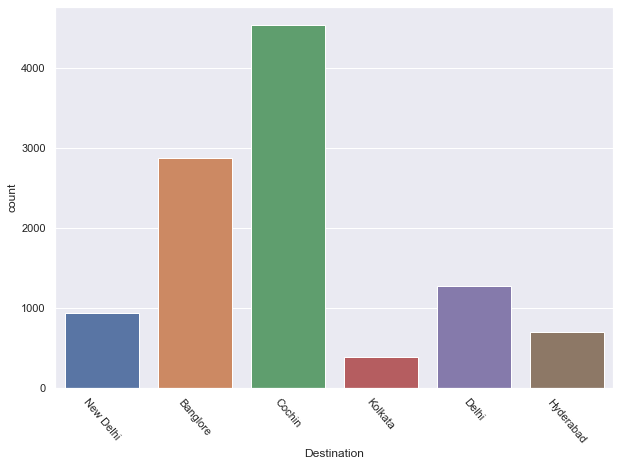

In [19]:
#checking the clumns
sns.set_theme(style="darkgrid")
print(df['Destination'].value_counts())
plt.figure(figsize=(10,7))
plt.xticks(rotation=-50)
sns.countplot(df['Destination'])

The destination cities, whith cochin topping the list

2019    10682
Name: Year, dtype: int64


<AxesSubplot:xlabel='Year', ylabel='count'>

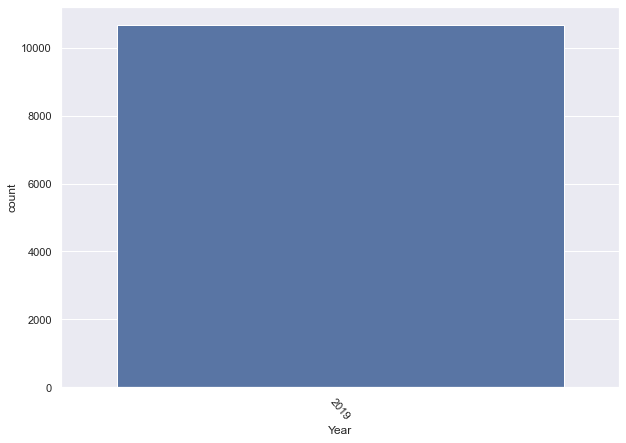

In [20]:
#checking the clumns
print(df['Year'].value_counts())
plt.figure(figsize=(10,7))
plt.xticks(rotation=-50)
sns.countplot(df['Year'])

There is just single year data, we can ignore the column

In [21]:
#droping year column
df.drop(['Year'],inplace=True,axis=1)

In [22]:
#handling time values in arrival and departure time
df["Departure_hour"]= pd.to_datetime(df.Dep_Time).dt.hour
df["Departure_minute"]= pd.to_datetime(df.Dep_Time).dt.minute
df["Arrival_hour"]= pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_minute"]= pd.to_datetime(df.Arrival_Time).dt.minute

In [23]:
#droping the columns dep and arrival time
df=df.drop(columns="Dep_Time")
df=df.drop(columns="Arrival_Time")

In [24]:
#extracting just the values from total stops
df['Total_Stops'] = df['Total_Stops'].str.split().str[0]


In [25]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Month,Day,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,13302,1,3,16,50,21,35


We can replace the non stop value in total stops by zero

In [26]:
df['Total_Stops'] = df['Total_Stops'].replace(['non-stop'],0)

In [27]:
df['Total_Stops'].unique()

array([0, '2', '1', '3', '4'], dtype=object)

In [28]:
df['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → JDH → JAI → DEL → HYD       1
BOM → VNS → DEL → HYD             1
BOM → BBI → HYD                   1
BLR → BOM → IXC → DEL             1
BOM → JAI → DEL → HYD             1
Name: Route, Length: 128, dtype: int64

Since we have the number of stops, we could ignore the route column

In [29]:
df=df.drop(columns="Route")

In [30]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Month,Day,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,21,35


In [31]:
#checking the Duration column
df['Duration'].value_counts(),df['Duration'].nunique()

(2h 50m     550
 1h 30m     386
 2h 55m     337
 2h 45m     337
 2h 35m     329
           ... 
 37h 10m      1
 41h 20m      1
 29h 40m      1
 30h 25m      1
 13h 35m      1
 Name: Duration, Length: 368, dtype: int64,
 368)

We can try changing the duration to minutes

In [32]:
#making a list for duration
dur = list(df['Duration'])
dur

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [33]:
#filling missing hours and minutes
for i in range(len(dur)):
    if len(dur[i].split()) != 2:
        if 'm' in dur[i]:
            dur[i] = '0h' + dur[i]
        else:
            dur[i] = dur[i] + '0m'

In [34]:
dur

['2h 50m',
 '7h 25m',
 '19h0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 

In [35]:
#extracting hours
dur_hour=[]
for hour in dur:
    dur_hour.append(hour.split('h')[0])
dur_hour

['2',
 '7',
 '19',
 '5',
 '4',
 '2',
 '15',
 '21',
 '25',
 '7',
 '13',
 '2',
 '2',
 '12',
 '2',
 '26',
 '4',
 '22',
 '23',
 '20',
 '5',
 '15',
 '2',
 '2',
 '13',
 '15',
 '5',
 '5',
 '2',
 '2',
 '2',
 '13',
 '2',
 '22',
 '5',
 '10',
 '5',
 '2',
 '6',
 '11',
 '11',
 '8',
 '22',
 '2',
 '12',
 '2',
 '2',
 '2',
 '16',
 '19',
 '3',
 '25',
 '2',
 '3',
 '2',
 '16',
 '15',
 '2',
 '6',
 '25',
 '12',
 '27',
 '10',
 '10',
 '2',
 '10',
 '2',
 '1',
 '13',
 '2',
 '1',
 '26',
 '7',
 '13',
 '5',
 '2',
 '2',
 '1',
 '19',
 '2',
 '14',
 '2',
 '22',
 '9',
 '10',
 '21',
 '5',
 '18',
 '12',
 '18',
 '9',
 '11',
 '17',
 '13',
 '2',
 '2',
 '2',
 '3',
 '1',
 '16',
 '12',
 '12',
 '7',
 '24',
 '2',
 '8',
 '7',
 '14',
 '30',
 '19',
 '15',
 '2',
 '12',
 '10',
 '5',
 '15',
 '16',
 '10',
 '2',
 '11',
 '2',
 '1',
 '14',
 '20',
 '2',
 '23',
 '18',
 '16',
 '2',
 '2',
 '8',
 '16',
 '3',
 '2',
 '14',
 '23',
 '21',
 '21',
 '2',
 '10',
 '8',
 '8',
 '5',
 '8',
 '11',
 '27',
 '8',
 '20',
 '4',
 '8',
 '2',
 '24',
 '2',
 '12',
 

In [36]:
#extracting minutes
dur_min=[]
for min in dur:
   dur_min.append(min.split('h')[1].split('m')[0])
dur_min

[' 50',
 ' 25',
 '0',
 ' 25',
 ' 45',
 ' 25',
 ' 30',
 ' 5',
 ' 30',
 ' 50',
 ' 15',
 ' 35',
 ' 15',
 ' 10',
 ' 35',
 ' 35',
 ' 30',
 ' 35',
 '0',
 ' 35',
 ' 10',
 ' 20',
 ' 50',
 ' 55',
 ' 20',
 ' 10',
 ' 45',
 ' 55',
 ' 50',
 ' 15',
 ' 15',
 ' 25',
 ' 50',
 '0',
 ' 30',
 ' 25',
 ' 15',
 ' 30',
 ' 15',
 ' 55',
 ' 5',
 ' 30',
 ' 5',
 ' 45',
 '0',
 ' 50',
 ' 50',
 ' 15',
 ' 5',
 ' 55',
 ' 15',
 ' 20',
 ' 50',
 '0',
 ' 50',
 ' 15',
 ' 5',
 ' 15',
 ' 30',
 ' 5',
 ' 25',
 ' 20',
 ' 15',
 ' 30',
 ' 15',
 ' 25',
 ' 50',
 ' 30',
 ' 20',
 ' 15',
 ' 25',
 ' 30',
 ' 20',
 ' 30',
 '0',
 ' 45',
 ' 50',
 ' 30',
 ' 5',
 ' 15',
 ' 50',
 ' 40',
 ' 10',
 ' 35',
 '0',
 ' 20',
 ' 25',
 ' 45',
 ' 20',
 '0',
 ' 15',
 ' 5',
 ' 30',
 ' 20',
 ' 35',
 ' 25',
 ' 40',
 '0',
 ' 25',
 ' 35',
 ' 20',
 ' 15',
 ' 30',
 '0',
 ' 45',
 ' 55',
 ' 10',
 ' 30',
 ' 20',
 ' 55',
 '0',
 ' 55',
 ' 45',
 ' 10',
 ' 55',
 ' 25',
 ' 5',
 ' 10',
 ' 40',
 ' 55',
 ' 40',
 ' 25',
 ' 5',
 ' 15',
 ' 25',
 ' 10',
 ' 10',
 '0',
 ' 50',
 '

In [37]:
#creating new columns
df['duration_hour'] = dur_hour
df['duration_minute'] = dur_min

In [38]:
#droping duration
df.drop(['Duration'],axis=1,inplace=True)

In [39]:
df.dtypes

Airline             object
Source              object
Destination         object
Total_Stops         object
Price                int64
Month                int64
Day                  int64
Departure_hour       int64
Departure_minute     int64
Arrival_hour         int64
Arrival_minute       int64
duration_hour       object
duration_minute     object
dtype: object

In [40]:
#changing the datatypes
df['Total_Stops']=df['Total_Stops'].astype(int)
df['duration_hour']=df['duration_hour'].astype(int)
df['duration_minute']=df['duration_minute'].astype(int)
     

In [41]:
df.dtypes

Airline             object
Source              object
Destination         object
Total_Stops          int32
Price                int64
Month                int64
Day                  int64
Departure_hour       int64
Departure_minute     int64
Arrival_hour         int64
Arrival_minute       int64
duration_hour        int32
duration_minute      int32
dtype: object

In [42]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Month,Day,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
9502       1
13875      1
7742       1
5703       1
4098       1
Name: Price, Length: 1870, dtype: int64


<AxesSubplot:xlabel='Price', ylabel='Count'>

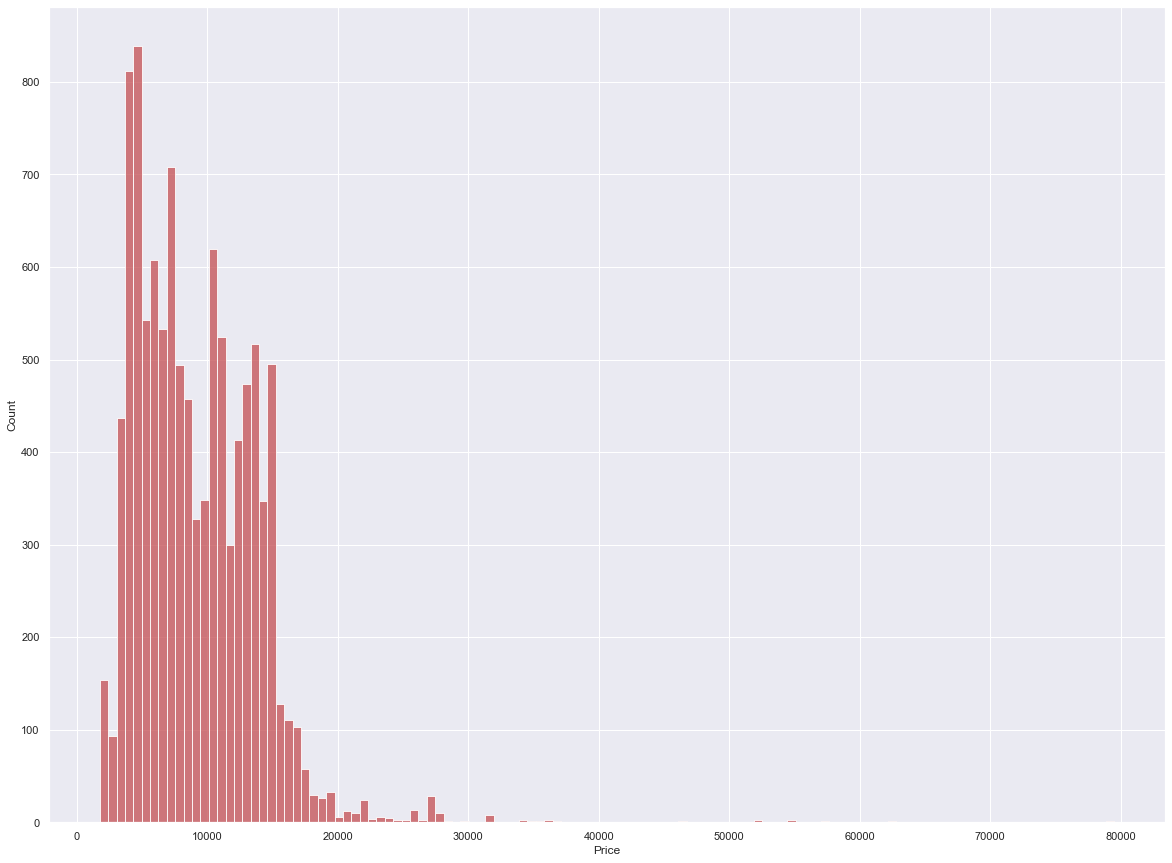

In [43]:
#checking the numerical columns
print(df['Price'].value_counts())
plt.figure(figsize=(20,15))
##plt.xticks(rotation=-50)
sns.histplot(df['Price'],color='r')

The price range is arount 5 to 20k, the plot also denotes the possibility of outliers

6     2535
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: Month, dtype: int64


<AxesSubplot:xlabel='Month', ylabel='Count'>

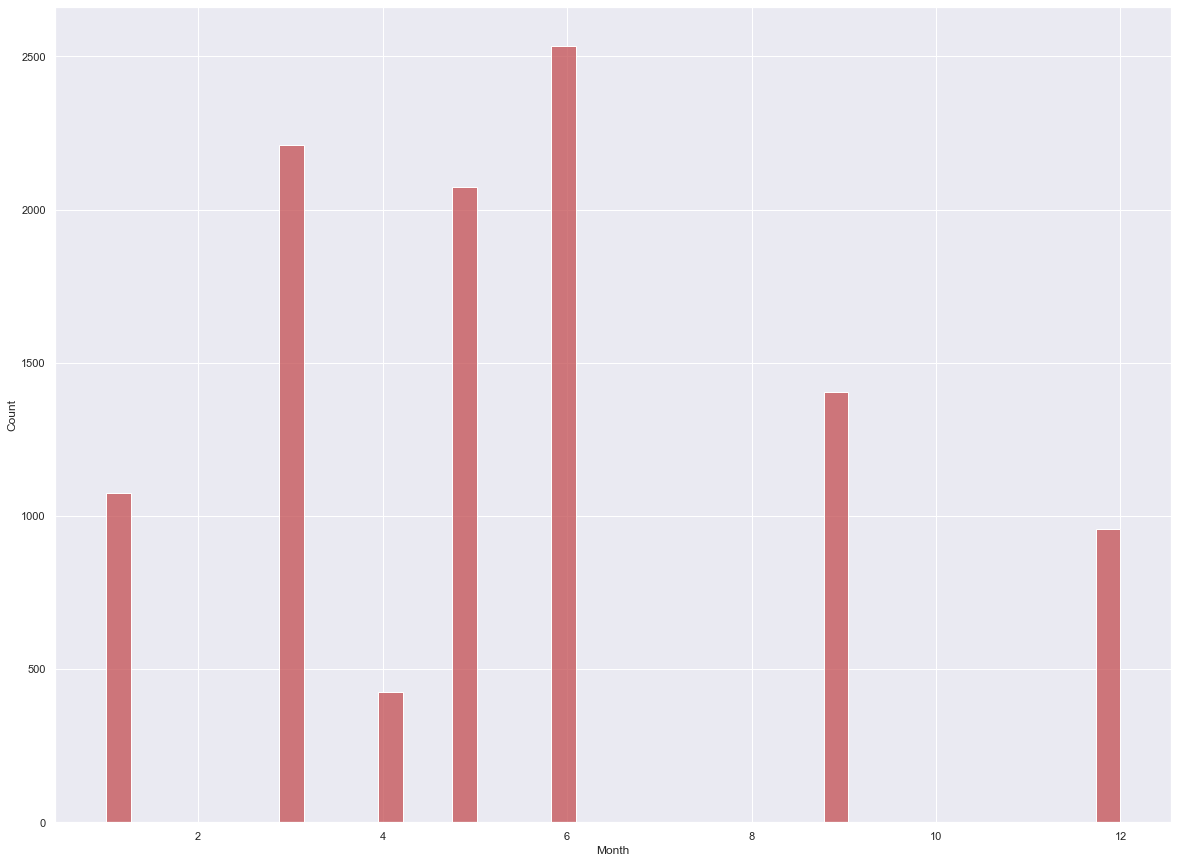

In [44]:
#checking the  columns
print(df['Month'].value_counts())
plt.figure(figsize=(20,15))
##plt.xticks(rotation=-50)
sns.histplot(df['Month'],color='r')

The plot is showing that the most travels is around the month June, followed by march

2     2402
1      621
3      501
7      487
5      481
9      445
12     428
8      424
13     407
11     365
10     355
6      340
14     337
15     268
23     264
26     241
16     234
4      222
22     218
24     197
21     196
25     186
27     179
20     162
18     141
19     134
17     129
28      94
29      65
30      49
38      34
37      17
33      13
32       9
34       8
35       7
36       7
31       6
47       2
42       2
39       2
40       1
41       1
0        1
Name: duration_hour, dtype: int64


<AxesSubplot:xlabel='duration_hour', ylabel='Count'>

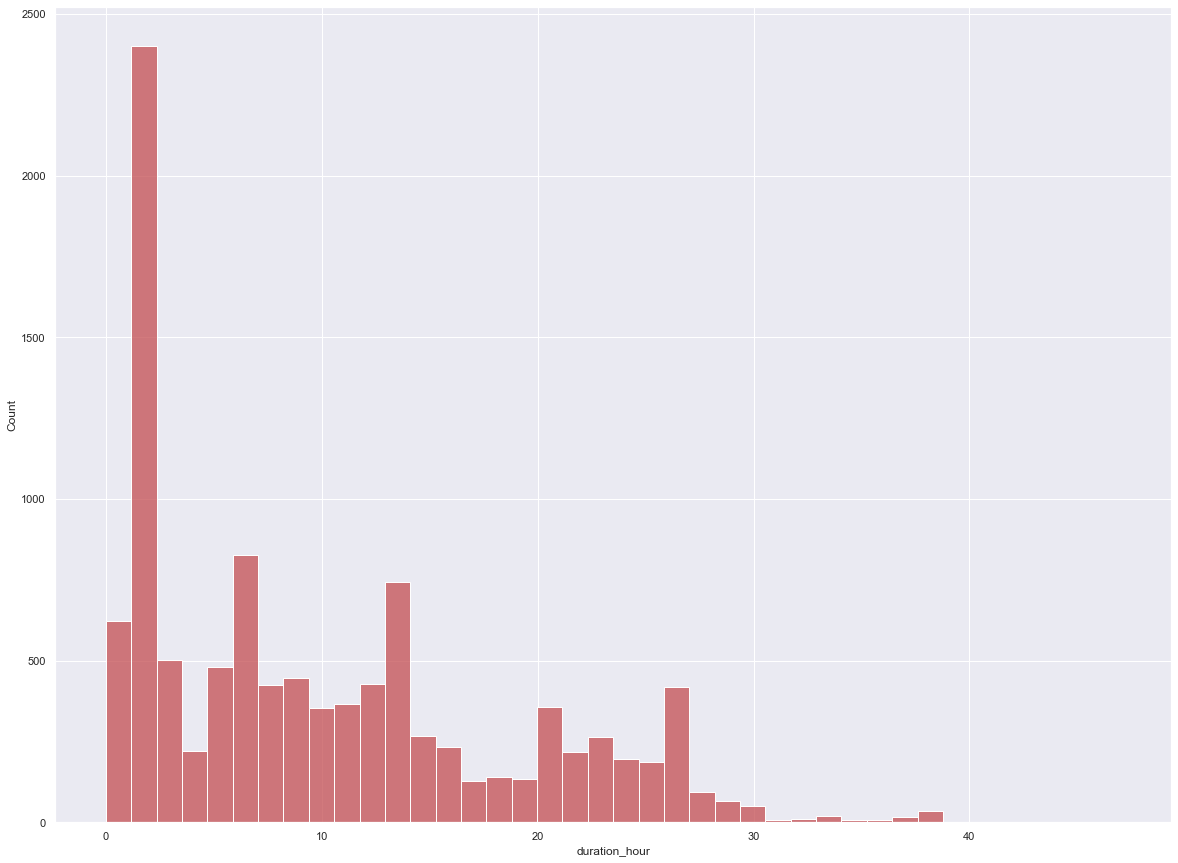

In [45]:

#checking the  columns
print(df['duration_hour'].value_counts())
plt.figure(figsize=(20,15))
##plt.xticks(rotation=-50)
sns.histplot(df['duration_hour'],color='r')

2 hour flights are the most common, followed by 7 hour flights, the highest duration is 40 hour flight

<AxesSubplot:xlabel='Airline', ylabel='Price'>

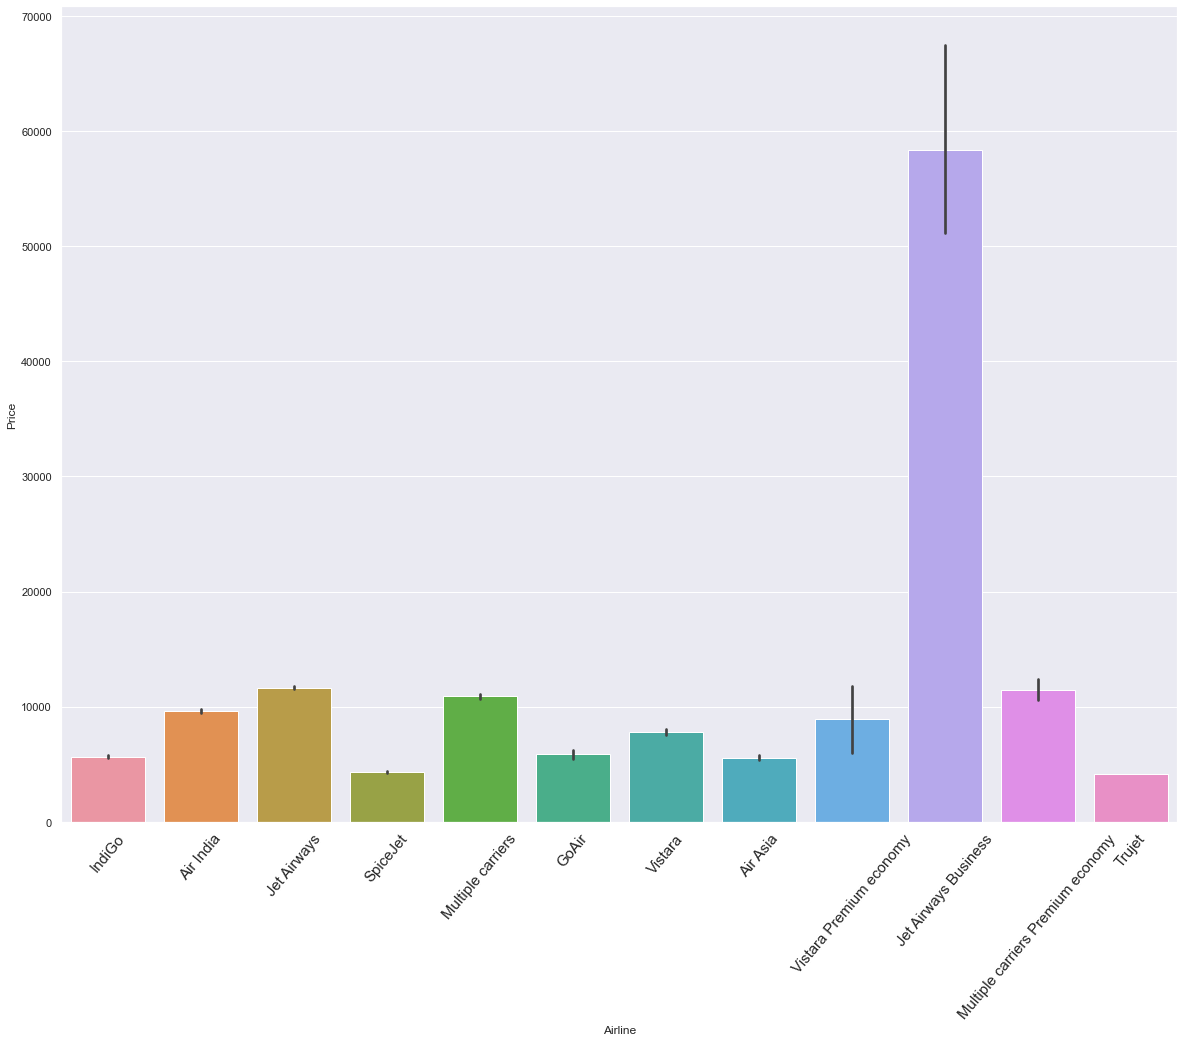

In [46]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=50,fontsize=15)
sns.barplot(x='Airline',y='Price',data=df)

Jet airways business has the highest ticket price and spice jet and truejet the lowest



<AxesSubplot:xlabel='duration_hour', ylabel='Price'>

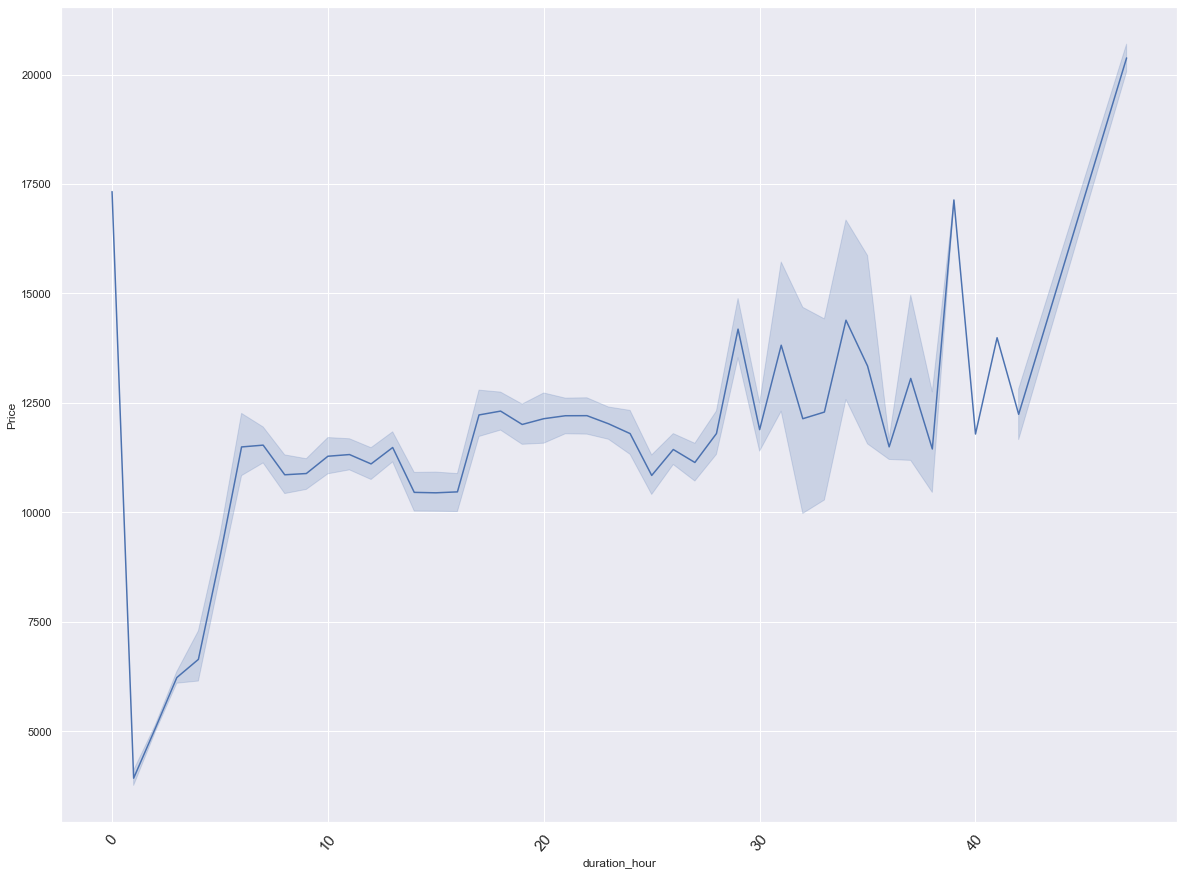

In [47]:
#plotting duration with price
plt.figure(figsize=(20,15))
plt.xticks(rotation=50,fontsize=15)
sns.lineplot(x='duration_hour',y='Price',data=df)

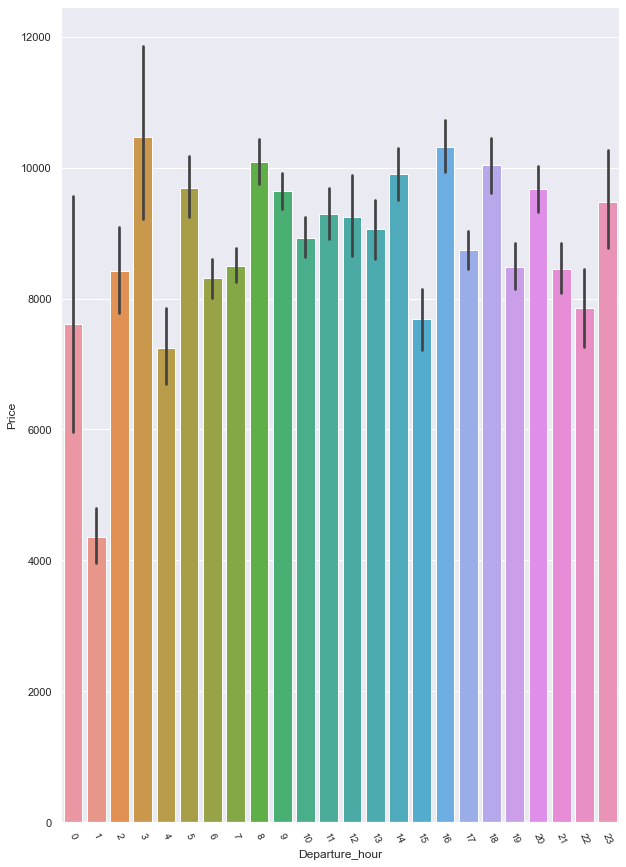

In [48]:
#Price vs departure time
plt.figure(figsize = (10,15))
sns.barplot(x = 'Departure_hour', y ='Price', data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

Some of the early morning flights costs more

In [49]:
#Encoding
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))

In [50]:
#checking the correlation
dfcor=df.corr()
dfcor

,Airline,Source,Destination,Total_Stops,Price,Month,Day,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute
Airline,1.000000,-0.013397,0.018446,-0.199396,-0.039565,-0.007900,0.031118,-0.035269,-0.059922,-0.007567,-0.071092,-0.158136,-0.028009
Source,-0.013397,1.000000,-0.592576,0.192840,0.015999,0.063052,0.007563,0.059047,-0.056998,0.025635,0.021040,0.166121,-0.145193
Destination,0.018446,-0.592576,1.000000,-0.295476,-0.071122,-0.105035,-0.052102,-0.072997,0.127931,-0.039729,0.017196,-0.258446,0.061235
Total_Stops,-0.199396,0.192840,-0.295476,1.000000,0.603897,0.065495,-0.024136,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706
Price,-0.039565,0.015999,-0.071122,0.603897,1.000000,0.010705,-0.165448,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855
Month,-0.007900,0.063052,-0.105035,0.065495,0.010705,1.000000,-0.264896,0.028189,0.002136,-0.004329,-0.025786,0.055552,-0.018597
Day,0.031118,0.007563,-0.052102,-0.024136,-0.165448,-0.264896,1.000000,-0.002301,-0.016433,-0.002176,-0.021423,-0.037964,-0.007708
Departure_hour,-0.035269,0.059047,-0.072997,-0.061476,0.006799,0.028189,-0.002301,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707
Departure_minute,-0.059922,-0.056998,0.127931,-0.002618,-0.024458,0.002136,-0.016433,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485
Arrival_hour,-0.007567,0.025635,-0.039729,0.038140,0.024244,-0.004329,-0.002176,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309


<AxesSubplot:>

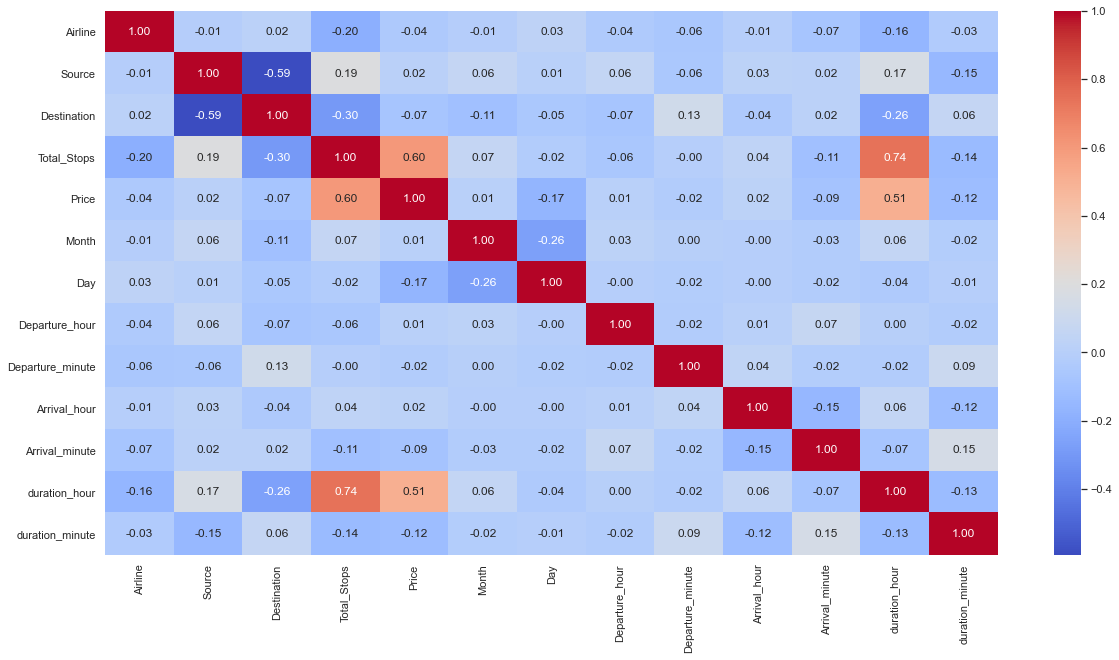

In [51]:
#plotting the correlation

plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f',cmap="coolwarm")

Total_Stops,duration_hour seems to be having a possitive correlation to the price variavble

Airline seems to be having a negative correlatiom



In [52]:
#cheking correlation to target
dfcor['Price'].sort_values(ascending=False)

Price               1.000000
Total_Stops         0.603897
duration_hour       0.508778
Arrival_hour        0.024244
Source              0.015999
Month               0.010705
Departure_hour      0.006799
Departure_minute   -0.024458
Airline            -0.039565
Destination        -0.071122
Arrival_minute     -0.086155
duration_minute    -0.124855
Day                -0.165448
Name: Price, dtype: float64

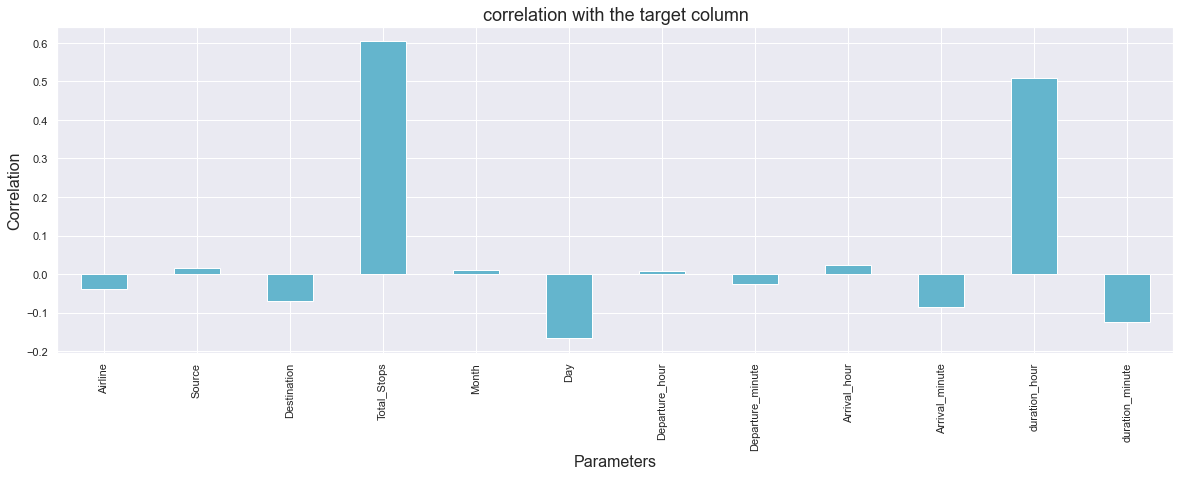

In [53]:
#plotting correlation to target
plt.figure(figsize = (20,6))
dfcor['Price'].drop(['Price']).plot(kind = 'bar', color = 'c')
plt.xlabel('Parameters', fontsize = 16)
plt.ylabel('Correlation', fontsize = 16)
plt.title('correlation with the target column', fontsize = 18)
plt.show()

As we have seen earlier Total number of stops has the highest possitive correlation followed by the duration

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

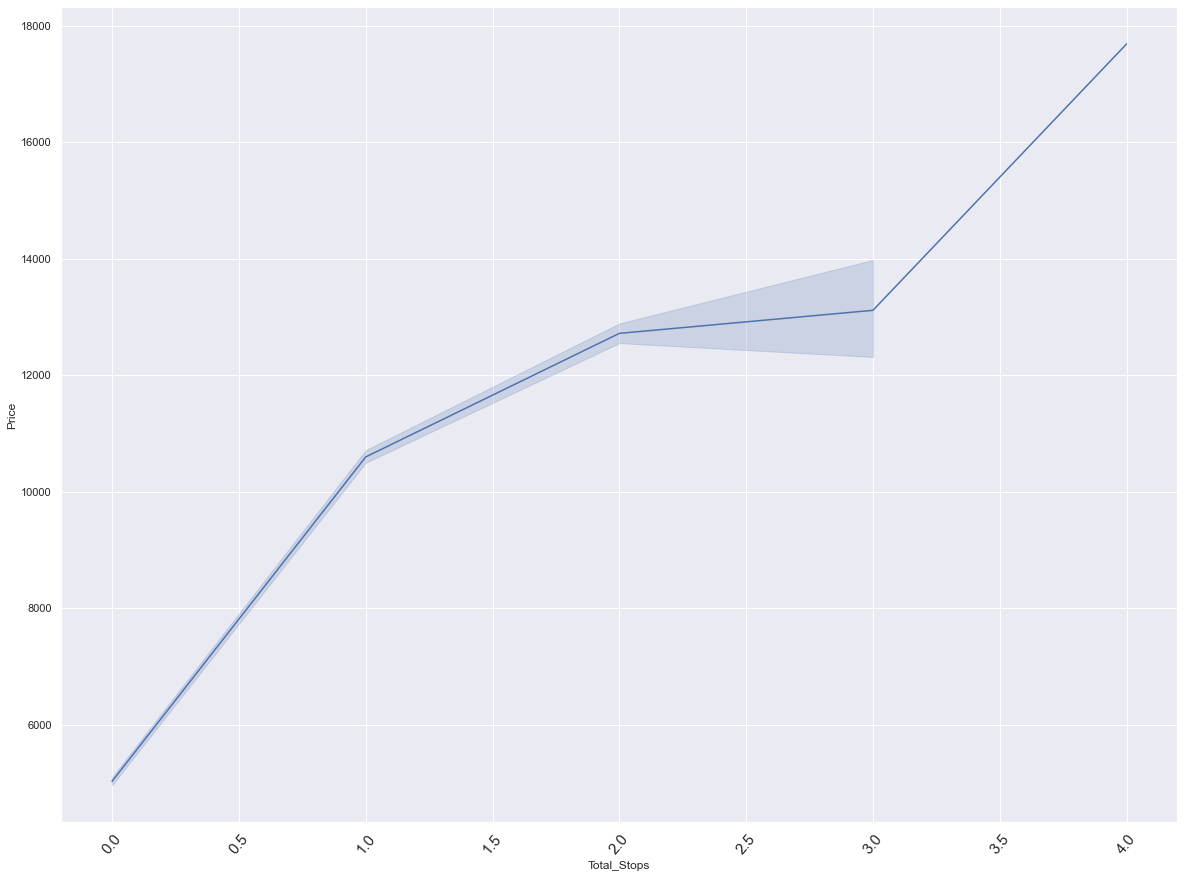

In [54]:
#plotting total stops with price
plt.figure(figsize=(20,15))
plt.xticks(rotation=50,fontsize=15)
sns.lineplot(x='Total_Stops',y='Price',data=df)

We can see that the price increasing as the number of stops goes up

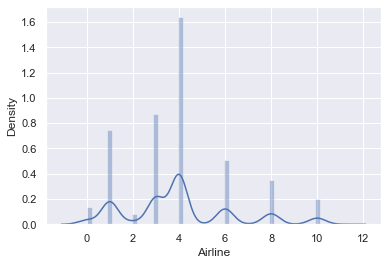

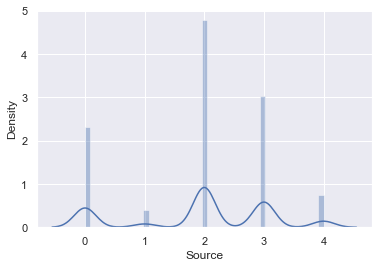

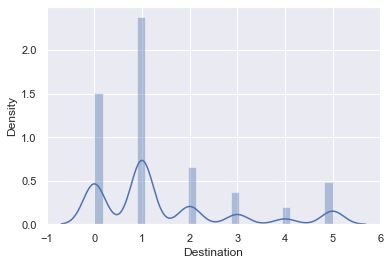

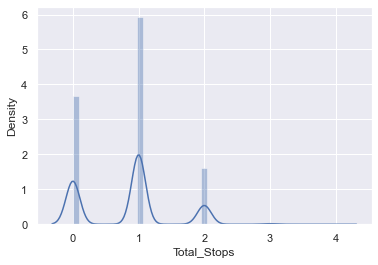

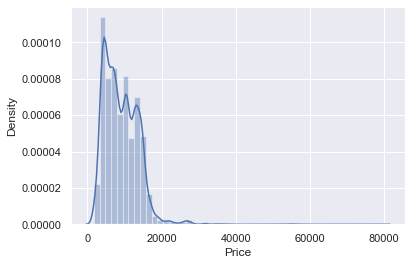

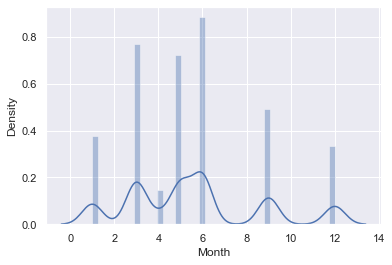

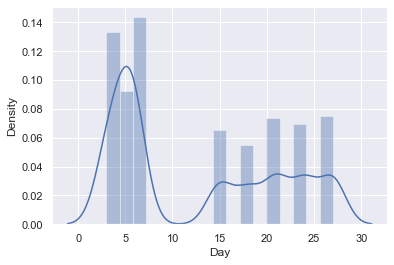

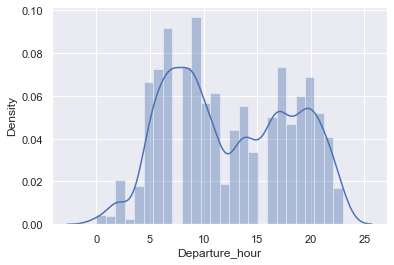

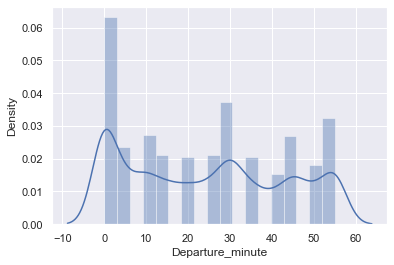

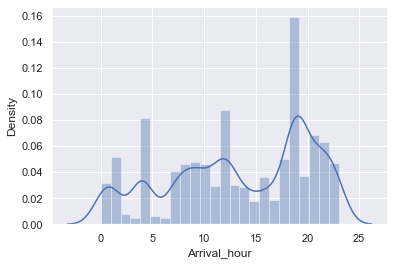

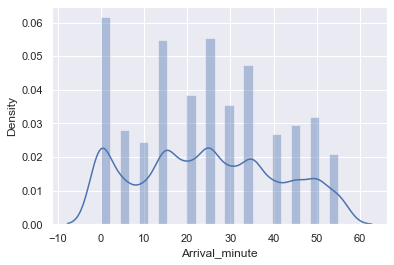

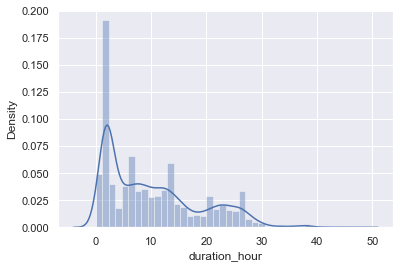

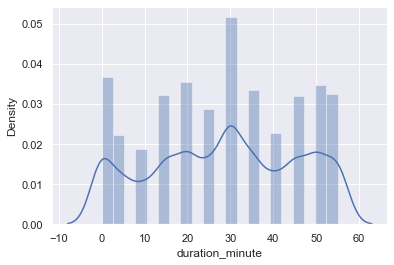

In [55]:
#checking for skewness
for i in df.columns: 
    sns.distplot(df[i], kde = True)
    plt.show()

In [56]:
#splitting x and y
x = df.drop(['Price'], axis = 1)
y = df['Price']

In [57]:
x.shape,y.shape

((10682, 12), (10682,))

In [58]:
#scaling

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [59]:
#importing model libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [60]:
#checking the best random state

lr=LinearRegression()
maxacc=0
maxrs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=r2_score(y_test, predlr)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best r2 score',maxacc,'on random state',maxrs)

best r2 score 0.47754883106994184 on random state 64


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 64)

In [62]:
def model(mod):
    mod.fit(x_test,y_test)
    ##print(mod.coef_)
    pred=mod.predict(x_test)
    mod.score(x_train,y_train)
    print('\n\n')
    ##print('predicted', pred)
    ##print('actual:',y_test)
    rscr=r2_score(y_test,pred)
    print('r2score:',r2_score(y_test,pred))
    print('Mean squared error',mean_squared_error(y_test,pred))
    print('Root Mean squared error',np.sqrt(mean_squared_error(y_test,pred)))
    print('mean absolute error:',mean_absolute_error(y_test,pred))

In [63]:
#function for cross-validation
from sklearn.model_selection import cross_val_score
def crossval(mod):
    scores = cross_val_score(mod, x_train, y_train, scoring='r2',cv=5)
    print('mean_cross_validation:',scores.mean())

In [64]:
model(LinearRegression())
crossval(LinearRegression())




r2score: 0.48813597334339986
Mean squared error 9501582.752697084
Root Mean squared error 3082.4637471829387
mean absolute error: 2304.7200652152655
mean_cross_validation: 0.4066160171894794


In [65]:
model(Lasso(alpha=0.01))
crossval(Lasso(alpha=0.01))




r2score: 0.4881359732776561
Mean squared error 9501582.753917467
Root Mean squared error 3082.4637473808943
mean absolute error: 2304.7183862688717
mean_cross_validation: 0.40661601998535896


In [66]:
model(Ridge(alpha=0.01))
crossval(Ridge(alpha=0.01))




r2score: 0.4881359733370888
Mean squared error 9501582.752814235
Root Mean squared error 3082.4637472019417
mean absolute error: 2304.7195911349622
mean_cross_validation: 0.4066160222544295


In [67]:
model(RandomForestRegressor())

crossval(RandomForestRegressor())




r2score: 0.9609994205638478
Mean squared error 723956.3900128165
Root Mean squared error 850.8562687157076
mean absolute error: 525.6472335500087
mean_cross_validation: 0.7749280112747267


In [68]:
model(KNeighborsRegressor())
crossval(KNeighborsRegressor())




r2score: 0.7604689834092194
Mean squared error 4446344.453703589
Root Mean squared error 2108.635685390814
mean absolute error: 1440.4878003120125
mean_cross_validation: 0.6359012686127057


In [69]:
model(DecisionTreeRegressor())
crossval(DecisionTreeRegressor())




r2score: 0.9839264119874443
Mean squared error 298369.32990119606
Root Mean squared error 546.2319378260448
mean absolute error: 146.3185647425897
mean_cross_validation: 0.5988454107997127


In [70]:
model(ElasticNet())
crossval(ElasticNet())




r2score: 0.4485927364657919
Mean squared error 10235612.334647294
Root Mean squared error 3199.314353833848
mean absolute error: 2413.143391359028
mean_cross_validation: 0.36840357460734946


Selcting Kneighbors regressor as r2 score is better, and crosss validation difference is not too high



### Hyper parameter tuning

In [71]:
from sklearn.model_selection import GridSearchCV
parameters = {'leaf_size' : [1,5,10],
              'n_neighbors' :[3,5,11,19] ,
              'p':[1,2],
              'weights':['uniform','distance']}

In [72]:
knn = KNeighborsRegressor()
rgf = GridSearchCV(knn, parameters,verbose=1)
rgf.fit(x_train, y_train)

print(rgf.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'leaf_size': 5, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


In [73]:
knf=KNeighborsRegressor(leaf_size=5, p=1,n_neighbors=5,weights='uniform')
knf.fit(x_train,y_train)
knf.score(x_train, y_train)
pred_kn = knf.predict(x_test)
print('Mean absolute error: ', mean_absolute_error(y_test,pred_kn))
print('Mean squared error: ', mean_squared_error(y_test,pred_kn))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred_kn)))
print('R2 Score: ', r2_score(y_test,pred_kn))


Mean absolute error:  1482.9791575663028
Mean squared error:  4977546.260405616
Root mean squared error:  2231.0415192025484
R2 Score:  0.7318523725957653


### We are getting an R2 score of 0.7318523725957653

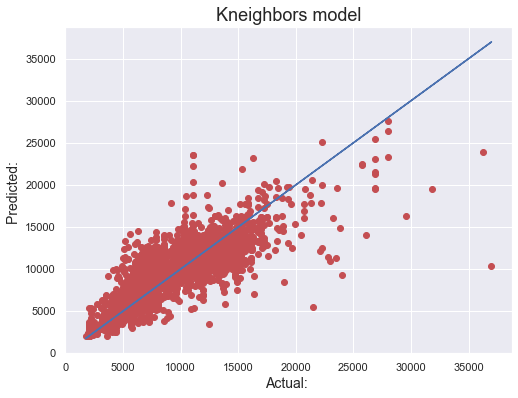

In [74]:
#plotting the model
plt.figure(figsize = (8,6))
plt.scatter(x = y_test, y = pred_kn, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual: ', fontsize = 14)
plt.ylabel('Predicted: ', fontsize = 14)
plt.title('Kneighbors model', fontsize = 18)
plt.show()

### Saving model

In [75]:
import joblib
joblib.dump(knf, 'Flight_price.obj')

['Flight_price.obj']

### importing test data

In [76]:
test = pd.read_excel('Test_set.xlsx')
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [77]:
#checking null values
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [78]:
test['Date_of_Journey'] = pd.to_datetime(test.Date_of_Journey)
#making new columns for the values in date colum

test['Year'] = test['Date_of_Journey'].dt.year
test['Month'] = test['Date_of_Journey'].dt.month
test['Day'] = test['Date_of_Journey'].dt.day

In [79]:
#Removing the date column
test.drop(['Date_of_Journey'],axis=1,inplace=True)

In [80]:
test.drop(['Additional_Info'],inplace=True, axis=1)

In [81]:
#droping year column
test.drop(['Year'],inplace=True,axis=1)

In [82]:
#handling time values in arrival and departure time
test["Departure_hour"]= pd.to_datetime(test.Dep_Time).dt.hour
test["Departure_minute"]= pd.to_datetime(test.Dep_Time).dt.minute
test["Arrival_hour"]= pd.to_datetime(test.Arrival_Time).dt.hour
test["Arrival_minute"]= pd.to_datetime(test.Arrival_Time).dt.minute

In [83]:
#droping the columns dep and arrival time
test=test.drop(columns="Dep_Time")
test=test.drop(columns="Arrival_Time")

In [84]:
#extracting just the values from total stops
test['Total_Stops'] = test['Total_Stops'].str.split().str[0]

In [85]:
test['Total_Stops'] = test['Total_Stops'].replace(['non-stop'],0)

In [86]:
test=test.drop(columns="Route")

In [87]:
dur = list(test['Duration'])
#filling missing hours and minutes
for i in range(len(dur)):
    if len(dur[i].split()) != 2:
        if 'm' in dur[i]:
            dur[i] = '0h' + dur[i]
        else:
            dur[i] = dur[i] + '0m'

In [88]:
#extracting hours
dur_hour=[]
for hour in dur:
    dur_hour.append(hour.split('h')[0])
dur_hour

['10',
 '4',
 '23',
 '13',
 '2',
 '18',
 '15',
 '5',
 '2',
 '6',
 '28',
 '9',
 '10',
 '4',
 '17',
 '10',
 '9',
 '12',
 '9',
 '9',
 '14',
 '14',
 '11',
 '13',
 '2',
 '12',
 '2',
 '25',
 '19',
 '7',
 '2',
 '11',
 '7',
 '3',
 '1',
 '2',
 '1',
 '6',
 '17',
 '10',
 '2',
 '12',
 '1',
 '23',
 '5',
 '2',
 '23',
 '1',
 '27',
 '13',
 '28',
 '5',
 '26',
 '5',
 '2',
 '2',
 '5',
 '7',
 '5',
 '25',
 '13',
 '26',
 '5',
 '5',
 '2',
 '2',
 '5',
 '8',
 '3',
 '7',
 '1',
 '21',
 '16',
 '7',
 '1',
 '3',
 '2',
 '19',
 '2',
 '14',
 '2',
 '16',
 '5',
 '2',
 '10',
 '13',
 '2',
 '11',
 '2',
 '13',
 '18',
 '28',
 '5',
 '23',
 '1',
 '1',
 '13',
 '6',
 '1',
 '10',
 '4',
 '11',
 '7',
 '12',
 '2',
 '15',
 '1',
 '19',
 '13',
 '12',
 '9',
 '14',
 '2',
 '4',
 '7',
 '23',
 '10',
 '5',
 '22',
 '8',
 '27',
 '11',
 '2',
 '2',
 '5',
 '15',
 '2',
 '2',
 '9',
 '2',
 '8',
 '5',
 '5',
 '2',
 '2',
 '7',
 '19',
 '2',
 '2',
 '12',
 '2',
 '25',
 '10',
 '8',
 '3',
 '12',
 '3',
 '2',
 '12',
 '22',
 '7',
 '7',
 '7',
 '2',
 '2',
 '2',


In [89]:
#extracting minutes
dur_min=[]
for min in dur:
   dur_min.append(min.split('h')[1].split('m')[0])
dur_min

[' 55',
 '0',
 ' 45',
 '0',
 ' 50',
 ' 20',
 ' 5',
 ' 15',
 ' 45',
 ' 5',
 ' 55',
 ' 20',
 ' 15',
 ' 40',
 ' 20',
 ' 50',
 ' 15',
 ' 15',
 ' 10',
 ' 20',
 ' 50',
 ' 5',
 ' 35',
 ' 30',
 ' 50',
 ' 25',
 ' 30',
 ' 30',
 ' 25',
 '0',
 ' 30',
 ' 40',
 ' 5',
 '0',
 ' 25',
 ' 40',
 ' 25',
 ' 5',
 ' 5',
 ' 40',
 ' 30',
 ' 30',
 ' 30',
 ' 40',
 ' 15',
 ' 20',
 ' 35',
 ' 30',
 ' 40',
 ' 30',
 ' 20',
 ' 45',
 ' 25',
 ' 40',
 ' 15',
 ' 55',
 ' 45',
 ' 30',
 ' 20',
 ' 50',
 ' 15',
 ' 20',
 ' 45',
 ' 40',
 ' 40',
 ' 50',
 ' 25',
 ' 45',
 '0',
 ' 20',
 ' 30',
 ' 10',
 '0',
 ' 50',
 ' 30',
 '0',
 ' 50',
 ' 25',
 ' 55',
 ' 5',
 ' 50',
 ' 5',
 ' 55',
 ' 30',
 ' 15',
 ' 50',
 ' 15',
 ' 55',
 ' 30',
 ' 20',
 ' 10',
 ' 10',
 '0',
 ' 15',
 ' 15',
 ' 20',
 ' 25',
 ' 15',
 ' 20',
 ' 10',
 ' 35',
 '0',
 ' 50',
 ' 20',
 ' 30',
 ' 10',
 ' 30',
 '0',
 ' 45',
 ' 20',
 ' 50',
 ' 5',
 ' 35',
 ' 40',
 ' 15',
 '0',
 ' 25',
 ' 5',
 ' 45',
 ' 40',
 ' 40',
 ' 30',
 ' 35',
 ' 45',
 ' 15',
 ' 40',
 ' 30',
 ' 35',
 ' 20',


In [90]:
#creating new columns
test['duration_hour'] = dur_hour
test['duration_minute'] = dur_min

In [91]:
#droping duration
test.drop(['Duration'],axis=1,inplace=True)

In [92]:
test.dtypes

Airline             object
Source              object
Destination         object
Total_Stops         object
Month                int64
Day                  int64
Departure_hour       int64
Departure_minute     int64
Arrival_hour         int64
Arrival_minute       int64
duration_hour       object
duration_minute     object
dtype: object

In [94]:
#changing the datatypes
test['Total_Stops']=test['Total_Stops'].astype(int)
test['duration_hour']=test['duration_hour'].astype(int)
test['duration_minute']=test['duration_minute'].astype(int)

In [95]:
test.dtypes

Airline             object
Source              object
Destination         object
Total_Stops          int32
Month                int64
Day                  int64
Departure_hour       int64
Departure_minute     int64
Arrival_hour         int64
Arrival_minute       int64
duration_hour        int32
duration_minute      int32
dtype: object

In [96]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in test.columns:
    if test[i].dtypes == 'object':
        test[i] = oe.fit_transform(test[i].values.reshape(-1,1))

In [97]:
test.head()

,Airline,Source,Destination,Total_Stops,Month,Day,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,duration_hour,duration_minute
0,4.0,2.0,1.0,1,6,6,17,30,4,25,10,55
1,3.0,3.0,0.0,1,12,5,6,20,10,20,4,0
2,4.0,2.0,1.0,1,5,21,19,15,19,0,23,45
3,6.0,2.0,1.0,1,5,21,8,0,21,0,13,0
4,0.0,0.0,2.0,0,6,24,23,55,2,45,2,50


### re-importing obj

In [98]:

final = joblib.load('Flight_Price.obj')
final.predict(test)

array([11558.8,  9892.8, 11495.8, ..., 11558.8, 12378.4, 11558.8])

In [101]:
testdata=pd.DataFrame(final.predict(test))
testdata

,0
0,11558.8
1,9892.8
2,11495.8
3,8483.8
4,9236.8
...,...
2666,9918.0
2667,9761.0
2668,11558.8
2669,12378.4
